# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [125]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [126]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [127]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Amin\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


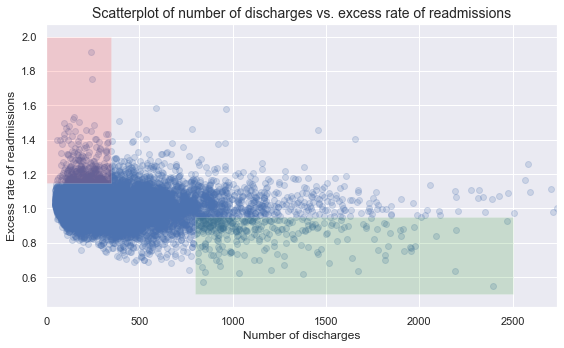

In [177]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

**Data Wranging**

In [129]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [130]:
clean_hospital_read_df.info(),clean_hospital_read_df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


(None, (11578, 12))

Excess Readmission Ratio      11497 non-null float64

Predicted Readmission Rate    11497 non-null float64

Expected Readmission Rate     11497 non-null float64

Number of Readmissions        11497 non-null float64

(11578 - 11497) null object exist for each of these columns

In [131]:
clean_hospital_read_df = clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'].notnull()]

clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int32
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


# A. Do you agree with the above analysis and recommendations? Why or why not?

**Initial observations**

In [132]:
# Compute the covariance matrix: covariance_matrix

covariance_matrix = np.cov(x,y)
# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = (covariance_matrix[0,1],covariance_matrix[1,0])

# Print the length/width covariance
print(petal_cov)

[[ 8.97280430e+04 -2.56308630e+00]
 [-2.56308630e+00  8.44773895e-03]]
(-2.5630863000698363, -2.5630863000698363)


**The coefficient is negative means one variable tends to increase as the other decreases but need more analysis**

In [133]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    
    corr_mat= np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [134]:
r = pearson_r(x,y)
# Print the result
print(r)

-0.09309554287590442


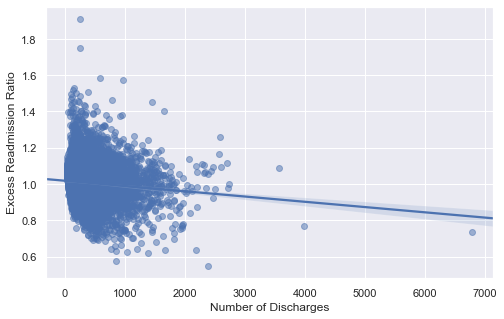

In [162]:
import seaborn as sns

sns.set(rc={'figure.figsize':(18,8)})
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.regplot(x='Number of Discharges', y='Excess Readmission Ratio', data=clean_hospital_read_df, scatter_kws={'alpha':0.5})

**Pearson correlation coefficient is -0.09, not equal zero and negative, which means when number of discharges increases, excess of re-admission decreases, but the correlation is pretty weak.**

# B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

 1. Setup hypothesis test
 
 **Ho : The Excess Readmission Ratio and Excess Readmission Ratio are independent**

 **Ha : The Excess Readmission Ratio and Excess Readmission Ratio are correlated**
 
  **Test Statistic: Pearson correlation coefficient**

<p>To do so, permute the Number of Discharges values but leave the Excess Readmission Ratio values fixed. This simulates the hypothesis that they are totally independent of each other. For each permutation, compute the Pearson correlation coefficient and assess how many of your permutation replicates have a Pearson correlation coefficient greater than the observed one.</p>

2. Compute and report the observed significance value (or p-value).

In [168]:
# Compute observed correlation: r_obs
r_obs = pearson_r(x,y)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    number_discharged_permuted = np.random.permutation(x)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(number_discharged_permuted,y)

# Compute p-value: p
p = np.sum(np.abs(perm_replicates)>=np.abs(r_obs))/len(perm_replicates)
print('p-val =', p)

p-val = 0.0


3. Report statistical significance for $\alpha$ = .01. 

In [160]:
alpha = 0.01
if p < alpha:
    print('p-value is less than 0.01.')
else:
    print('p-value is equal or more than than 0.01.')

p-value is less than 0.01.


**As p-value less than $\alpha$, we can reject the null hypothesis and accept alternative hypothesis which means that there is a correlation between number of discharges and excess readmission ratio.**

In [170]:
# calculate the correlation coefficient
r = np.corrcoef(x,y)[0][1]

# since r = 0 the formula for test statistic becomes: r * √(n-2)/(1-r**2)
n = len(x)
t_stat = r * np.sqrt(n-2)/np.sqrt(1-r**2)
p_value = stats.t.cdf(x=t_stat, df = n-2) * 2
p_value

1.4619278309357832e-21

4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

**The p-value is very small and less than $\alpha$ which means statistically significant , but  correlation coefficient (r = -0.093) is considered very small, so the effect size is insignificant and correlation is very weak**


+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 

In [189]:
x_less_100 = [a for a in clean_hospital_read_df[ clean_hospital_read_df['Number of Discharges']<100]['Number of Discharges'][81:-3]]
y_less_100 = list(clean_hospital_read_df[ clean_hospital_read_df['Number of Discharges']<100]['Excess Readmission Ratio'][81:-3])

In [190]:
# calculate the correlation coefficient
r = np.corrcoef(x_less_100,y_less_100)[0][1]

# since r = 0 the formula for test statistic becomes: r * √(n-2)/(1-r**2)
n = len(x_less_100)
t_stat = r * np.sqrt(n-2)/np.sqrt(1-r**2)
p_value = stats.t.cdf(x=t_stat, df = n-2) * 2
p_value

5.961537673818046e-09

In [194]:
from scipy.stats import pearsonr
correlation_less_100, p_value_less_100 = pearsonr(x_less_100, y_less_100)
correlation_less_100, p_value_less_100 

(-0.17395663657166147, 5.96153767382074e-09)

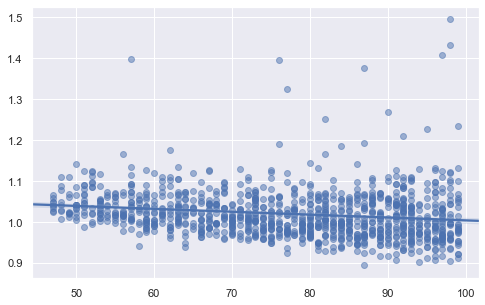

In [198]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.regplot(x_less_100,y_less_100, scatter_kws={'alpha':0.5})

+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

In [184]:
x_greater_1000 = [a for a in clean_hospital_read_df[ clean_hospital_read_df['Number of Discharges']>1000]['Number of Discharges'][81:-3]]
y_greater_1000 = list(clean_hospital_read_df[ clean_hospital_read_df['Number of Discharges']>1000]['Excess Readmission Ratio'][81:-3])

In [185]:
# calculate the correlation coefficient
r = np.corrcoef(x_greater_1000,y_greater_1000)[0][1]

# since r = 0 the formula for test statistic becomes: r * √(n-2)/(1-r**2)
n = len(x_greater_1000)
t_stat = r * np.sqrt(n-2)/np.sqrt(1-r**2)
p_value = stats.t.cdf(x=t_stat, df = n-2) * 2
p_value

0.32751687288091513

In [195]:
correlation_greater_1000, p_value_greater_1000 = pearsonr(x_greater_1000, y_greater_1000)
correlation_greater_1000, p_value_greater_1000

(-0.05042898206535658, 0.3275168728808253)

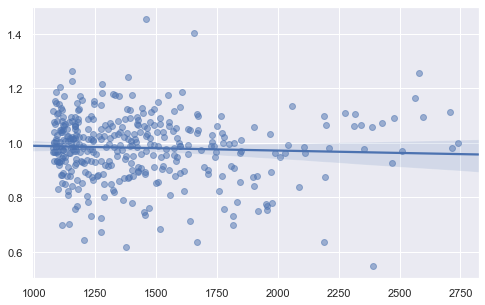

In [200]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.regplot(x_greater_1000,y_greater_1000, scatter_kws={'alpha':0.5})

# Conclusion

**For hospitals/facilities with number of discharges < 100, p-value (5.961537673818046e-09) is very small and less than $\alpha$ = .01, and there's small negative correlation between number of discharges and excess readmission ratio with pearson_r -0.17.**

**While for hospitals/facilities with number of discharges > 1000, p-value (0.3275168728808253) is greater than $\alpha$ = .01,then we can't reject null hypothesis and there is uncorrelated relationship between number of discharges and excess readmission ratio.**

**Therefore, We can make conclusion that statistical significance and practical significance is different here.**

# Recommendation

Since there is no correlation between number of discharges and excess readmission ratio, I would suggest to analize more variables which might be able to correlate with excess rate of readmissions.

5.1. What are the advantages and disadvantages of using this plot to convey information?

A scatter plot is powerful for visulization correlation of two features excluding the time data points do not have a clear relation and  it much  be better to perform inferential statistics.

5.2. Construct another plot that conveys the same information in a more direct manner.

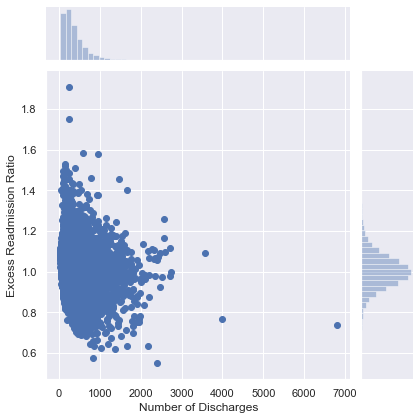

In [204]:
sns.jointplot(x='Number of Discharges', y='Excess Readmission Ratio', data=clean_hospital_read_df)

**hospitals/facilities with number of discharges < 100**

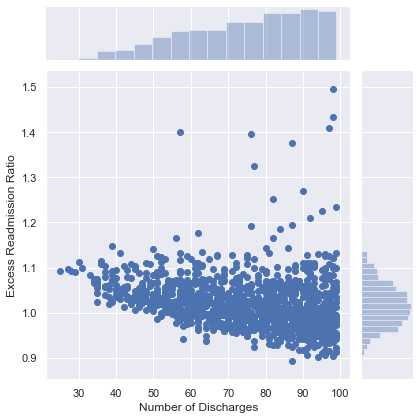

In [205]:
sns.jointplot(x='Number of Discharges', y='Excess Readmission Ratio', data=clean_hospital_read_df[ clean_hospital_read_df['Number of Discharges']<100])

**hospitals/facilities with number of discharges > 1000**

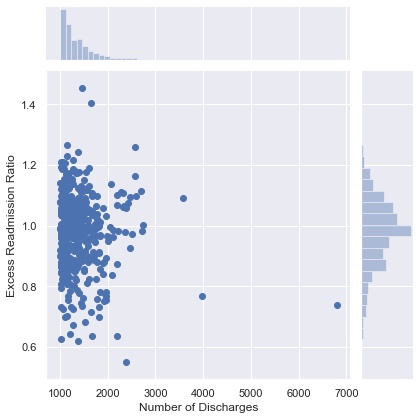

In [206]:
sns.jointplot(x='Number of Discharges', y='Excess Readmission Ratio', data=clean_hospital_read_df[ clean_hospital_read_df['Number of Discharges']>1000])